# Bar and stack plots with [PowerGraphics.jl](github.com/nrel-siip/PowerGraphics.jl)
PowerGraphics also provides some basic specifications for plotting `SimulationResults`.
This example demonstrates some simple plotting capabilities using different Plots.julia
backends.

The plotting capabilities use the Julia Plots package which can generate plots using
several different graphics packages. We'll use GR.jl and PlotlyJS.jl.

## Dependencies

In [2]:
using SIIPExamples #for path locations
using PowerSimulations #to load results
using PowerGraphics

┌ Info: Precompiling PowerGraphics [5f7eddb3-86b1-49e8-a95a-ddc0f45eea41]
└ @ Base loading.jl:1273
Expr(:block, #= Symbol("/Users/cbarrows/.julia/packages/Weave/zT0iu/src/WeaveMarkdown/markdown.jl"):11 =#, Expr(:function, Expr(:call, :latex, Expr(:::, :io, :IO), Expr(:::, :tex, Expr(:., :Markdown, :(:LaTeX)))), Expr(:block, #= Symbol("/Users/cbarrows/.julia/packages/Weave/zT0iu/src/WeaveMarkdown/markdown.jl"):12 =#, :math_envs = Expr(:vect, "align", "equation", "eqnarray"), #= Symbol("/Users/cbarrows/.julia/packages/Weave/zT0iu/src/WeaveMarkdown/markdown.jl"):13 =#, :use_dollars = Expr(:call, Symbol("!"), Expr(:call, :any, Expr(:comprehension, Expr(:generator, Expr(:call, :occursin, Expr(:string, "\begin{", :me), Expr(:., :tex, :(:formula))), :me = :math_envs)))), #= Symbol("/Users/cbarrows/.julia/packages/Weave/zT0iu/src/WeaveMarkdown/markdown.jl"):14 =#, Expr(:&&, :use_dollars, Expr(:call, :write, :io, "\[")), #= Symbol("/Users/cbarrows/.julia/packages/Weave/zT0iu/src/WeaveMarkdown/m

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16207918505457732292\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12487073398576376848\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16207918505457732292\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: Error requiring WebIO from Plots:
│ LoadError: UndefVarError: WebIO not defined
│ Stacktrace:
│  [1] top-level scope
│  [2] eval at ./boot.jl:330 [inlined]
│  [3] eval at /Users/cbarrows/.julia/packages/Plots/NVH6y/src/Plots.jl:1 [inlined]
│  [4] (::Plots.var"#495#498")() at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:85
│  [5] err(::Any, ::Module, ::String) at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:42
│  [6] (::Plots.var"#494#497")() at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:84
│  [7] withpath(::Any, ::String) at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:32
│  [8] (::Plots.var"#493#496")() at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:83
│  [9] listenpkg(::Any, ::Base.PkgId) at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:15
│  [10] top-level scope at /Users/cbarrows/.julia/packages/Requires/qy6zC/src/require.jl:81
│  [11] include at ./boot.jl:328 [inlined

### Results file
If you have already run some of the other examples, you should have generated some results.
You can load the results into memory with:

In [3]:
pkgpath = dirname(dirname(pathof(SIIPExamples)))
simulation_folder = joinpath(pkgpath, "RTS-GMLC-master", "rts-test")
simulation_folder = joinpath(simulation_folder, readdir(simulation_folder)[end])
res = load_simulation_results(simulation_folder, "UC")

# Plots

,Time,322_CT_6,321_CC_1,202_STEAM_3,315_STEAM_1,223_CT_4,123_STEAM_2
,Dates…,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-01-01T00:00:00,0.0,0.0,0.3,0.0,0.0,0.62
2,2020-01-01T01:00:00,0.0,0.0,0.3,0.0,0.0,0.62
3,2020-01-01T02:00:00,0.0,0.0,0.3,0.0,0.0,0.62
4,2020-01-01T03:00:00,0.0,0.0,0.3,0.0,0.0,0.62
5,2020-01-01T04:00:00,0.0,0.0,0.3,0.0,0.0,0.62
6,2020-01-01T05:00:00,0.22,0.0,0.3,0.0,0.0,0.62
7,2020-01-01T06:00:00,0.22,0.0,0.606667,0.0,0.0,0.93
8,2020-01-01T07:00:00,0.22,0.0,0.3,0.0,0.0,0.62
9,2020-01-01T08:00:00,0.0,0.0,0.3,0.0,0.0,0.62


By default, PowerGraphics uses the GR graphics package as the backend for Plots.jl to
generate figures. This creates static plots and should execute without any extra steps.
For example, we can create a stacked bar_plot:

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe def

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe def

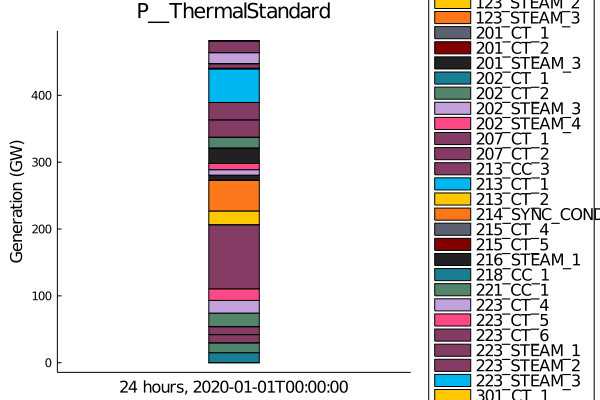

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe def

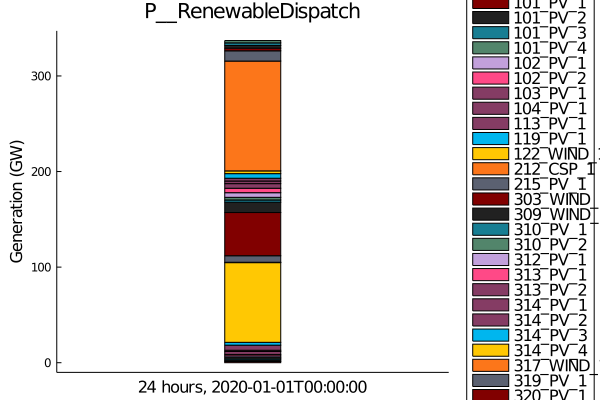

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe def

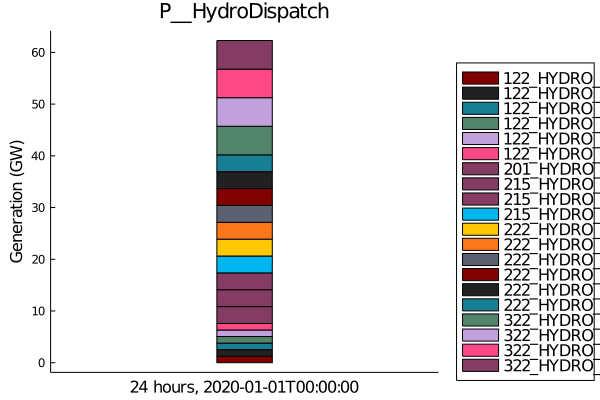

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarPlot, ::String, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe def

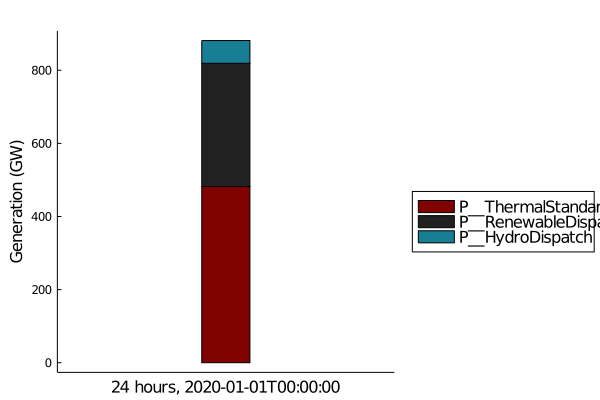

┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarGeneration, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarGeneration, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15
┌ Warning: Attribute alias `xlabel` detected in the user recipe defined for the signature (::PowerGraphics.BarGeneration, ::Array{RGBA{Float64},2}). To ensure expected behavior it is recommended to use the default attribute `xguide`.
└ @ Plots /Users/cbarrows/.julia/packages/Plots/NVH6y/src/pipeline.jl:15


In [4]:
gr() # loads the GR backend
bar_plot(res)

However, interactive plotting can generate much more insightful figures, especially when
creating somewhat complex stacked figures. So, we can use the PlotlyJS backend for Plots,
but it requires that PlotlyJS.jl, and ORCA.jl (if in a notebook, WebIO.jl is required too)
are installed in your Project.toml. To startup the PlotlyJS backend, run:

In [5]:
plotlyjs()

┌ Info: Precompiling ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1273


Plots.PlotlyJSBackend()

Now we can create stacked bar plots that can be inspected interactively.

In [7]:
p = bar_plot(res)

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, nam

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y"
]

layout: "layout with fields barmode, margin, title, and yaxis"

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y"
]

layout: "layout with fields barmode, margin, title, and yaxis"

data: [
  "bar with fields marker, name, type, x, and y",
  "bar with fields marker, name, type, x, and y",
  "bar with fields marker, name, type, x, and y"
]

layout: "layout with fields barmode, color, margin, title, and yaxis"

In [12]:
savefig(bar_plot(res), "test.png")

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, nam

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y"
]

layout: "layout with fields barmode, margin, title, and yaxis"

data: [
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y",
  "bar with fields barmode, marker, name, type, x, and y"
]

layout: "layout with fields barmode, margin, title, and yaxis"

data: [
  "bar with fields marker, name, type, x, and y",
  "bar with fields marker, name, type, x, and y",
  "bar with fields marker, name, type, x, and y"
]

layout: "layout with fields barmode, color, margin, title, and yaxis"

MethodError: MethodError: no method matching savefig(::Nothing, ::String)
Closest candidates are:
  savefig(!Matched::Plots.Plot, ::AbstractString) at /Users/cbarrows/.julia/packages/Plots/NVH6y/src/output.jl:124

Similarly, we can create a stack plot for any combination of variable to see the time
series values.

In [ ]:
stack_plot(res, [Symbol("P__PowerSystems.ThermalStandard"),
                Symbol("P__PowerSystems.RenewableDispatch")])

Or, we can create a series of stack plots for every variable in the dictionary:
```julia
stack_plot(res)
```

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*